In [1]:
from tbparse import SummaryReader

2026-02-18 00:16:29.072692: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-18 00:16:29.114040: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-18 00:16:30.118299: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [21]:
log_dir = "./data/q2_dagger_ant_Ant-v4_17-02-2026_23-58-04/"
reader = SummaryReader(log_dir)
df = reader.scalars
print(df.head())

   step                tag        value
0     0  Eval_AverageEpLen   844.333313
1     1  Eval_AverageEpLen   698.625000
2     2  Eval_AverageEpLen   860.500000
3     3  Eval_AverageEpLen   813.285706
4     4  Eval_AverageEpLen  1000.000000


In [26]:
returns_mean = [-1000.0 for _ in range(50)]
returns_stdev = [1000.0 for _ in range(50)]

for idx, row in df.iterrows():
    if row.tag == 'Eval_AverageReturn':
        returns_mean[row['step']] = row['value']
    if row.tag == 'Eval_StdReturn':
        returns_stdev[row['step']] = row['value']

In [27]:
out_df = pd.DataFrame(
    data = {
        'Eval_AverageReturn': returns_mean,
        'Eval_StdReturn': returns_stdev
    },
    index = [i for i in range(50)]
)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

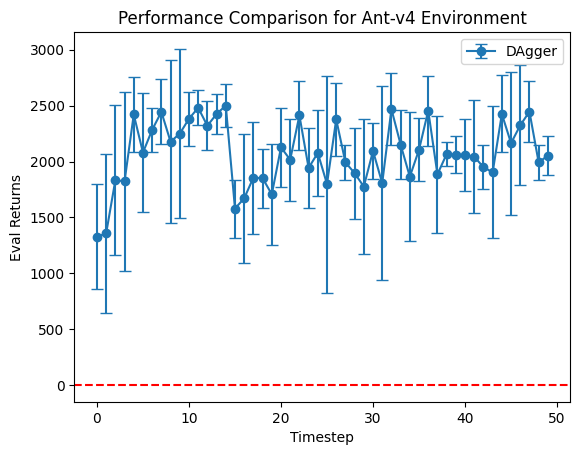

In [31]:
ax = out_df['Eval_AverageReturn'].plot(kind='line', yerr=out_df['Eval_StdReturn'], capsize=4, marker='o')

# 3. Customize the plot (optional, using the Matplotlib axes object)
ax.set_title('Performance Comparison for Ant-v4 Environment')
ax.set_xlabel('Timestep')
ax.set_ylabel('Eval Returns')
ax.legend(['DAgger'])
ax.axhline(y=0.5, color='r', linestyle='--', label='Threshold')
plt.show()